In [ ]:
import pandas as pd

# Load the CSV file
file_path = '/content/Revolutionizing Marketing Approaches with Viewer Data-Driven Content Automation_15 August 2024_17.32.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)
data.head()
# Remove the first row, which contains the question text
cleaned_data = data.iloc[1:].reset_index(drop=True)

# Convert the data to numeric where applicable, non-numeric data will remain unchanged
cleaned_data = cleaned_data.apply(pd.to_numeric, errors='ignore')

# Drop rows with more than 20% missing values
threshold = int(0.2 * len(cleaned_data.columns))
cleaned_data = cleaned_data.dropna(thresh=(len(cleaned_data.columns) - threshold))

# Save the cleaned data to a new CSV file
cleaned_data.to_csv('cleaned_data.csv', index=False)

# Display the first few rows of the cleaned data
print(cleaned_data.head())



    Q3   Q4  Q11  Q12  Q13  Q14  Q15  Q16  Q17  Q18  ...  Q41  Q42  Q45  Q43  \
0  3.0  1.0  5.0  2.0  3.0  1.0  1.0  5.0  5.0  4.0  ...  3.0  4.0  5.0  5.0   
1  3.0  1.0  4.0  4.0  2.0  2.0  2.0  4.0  3.0  2.0  ...  4.0  3.0  3.0  2.0   
2  3.0  2.0  5.0  4.0  3.0  1.0  1.0  3.0  3.0  2.0  ...  1.0  1.0  3.0  2.0   
3  2.0  2.0  5.0  3.0  2.0  3.0  3.0  4.0  4.0  2.0  ...  3.0  2.0  2.0  4.0   
4  2.0  2.0  3.0  4.0  4.0  4.0  4.0  3.0  3.0  4.0  ...  5.0  5.0  5.0  5.0   

   Q44  Q19  Q20  Q21   Q9                                                Q10  
0  4.0  1.0  2.0  2.0  5.0  Yes, the scenario completely reflected my ever...  
1  3.0  1.0  1.0  1.0  4.0                     Yes influenced me to buy more   
2  1.0  1.0  2.0  1.0  5.0  Definitely the same scenario happened a lot of...  
3  4.0  1.0  1.0  1.0  3.0     Yes it played a major role in buying decisions  
4  5.0  2.0  2.0  3.0  5.0                                        Yeah, it is  

[5 rows x 39 columns]


In [ ]:
# Load the manually cleaned CSV file
file_path = '/content/manual_cleaned_data.csv'  # Replace with your actual file path
cleaned_data = pd.read_csv(file_path)


# Example: Display the first few rows of the cleaned data to verify
print(cleaned_data.head())

# You can now proceed with your data analysis


   Q3  Q4  Q11  Q12  Q13  Q14  Q15  Q16  Q17  Q18  ...  Q41  Q42  Q45  Q43  \
0   3   1    5    2    3    1    1    5    5    4  ...    3    4  5.0    5   
1   3   1    4    4    2    2    2    4    3    2  ...    4    3  3.0    2   
2   3   2    5    4    3    1    1    3    3    2  ...    1    1  3.0    2   
3   2   2    5    3    2    3    3    4    4    2  ...    3    2  2.0    4   
4   2   2    3    4    4    4    4    3    3    4  ...    5    5  5.0    5   

   Q44  Q19  Q20  Q21  Q9                                                Q10  
0    4    1    2    2   5  Yes, the scenario completely reflected my ever...  
1    3    1    1    1   4                     Yes influenced me to buy more   
2    1    1    2    1   5  Definitely the same scenario happened a lot of...  
3    4    1    1    1   3     Yes it played a major role in buying decisions  
4    5    2    2    3   5                                        Yeah, it is  

[5 rows x 39 columns]


In [ ]:
likert_columns = ['Q11', 'Q12', 'Q13', 'Q14', 'Q15']

# Extract only those columns
numeric_likert_questions = data[likert_columns]

# Convert all values to numeric, forcing errors to NaN (which will be ignored in the stats)
numeric_likert_questions = numeric_likert_questions.apply(pd.to_numeric, errors='coerce')

# Function to calculate descriptive statistics for Likert scale questions
def calculate_descriptive_stats(df):
    descriptive_stats = df.agg(['mean', 'median', 'std'])
    return descriptive_stats.T  # Transpose for easier readability

# Calculate descriptive statistics for these questions
likert_descriptive_stats = calculate_descriptive_stats(numeric_likert_questions)

# Display the descriptive statistics
print("\nDescriptive Statistics for Likert Scale Questions:")
print(likert_descriptive_stats)



Descriptive Statistics for Likert Scale Questions:
         mean  median       std
Q11  3.554545     4.0  1.223518
Q12  3.054545     3.0  1.021210
Q13  2.627273     3.0  1.048013
Q14  2.281818     2.0  1.118090
Q15  2.400000     2.0  1.166820


In [ ]:
# Define the question ranges for each scenario
scenario_columns = {
    "Scenario 1": ['Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18'],
    "Scenario 2": ['Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29'],
    "Scenario 3": ['Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37'],
    "Scenario 4": ['Q38', 'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44'],
}

# Function to calculate descriptive statistics for each scenario
def calculate_scenario_stats(scenario_data):
    scenario_stats = scenario_data.apply(pd.to_numeric, errors='coerce').agg(['mean', 'median', 'std'])
    return scenario_stats.T  # Transpose for easier readability

# Calculate descriptive statistics for each scenario
scenario_stats = {}
for scenario, columns in scenario_columns.items():
    scenario_data = data[columns]
    scenario_stats[scenario] = calculate_scenario_stats(scenario_data)


In [ ]:
# Combine the statistics into a single DataFrame for easier display
combined_stats = pd.DataFrame({
    "Scenario 1": scenario_stats["Scenario 1"].mean(axis=0),
    "Scenario 2": scenario_stats["Scenario 2"].mean(axis=0),
    "Scenario 3": scenario_stats["Scenario 3"].mean(axis=0),
    "Scenario 4": scenario_stats["Scenario 4"].mean(axis=0)
}).T

combined_stats.columns = ['Mean', 'Median', 'Standard Deviation']

# Display the DataFrame
print("Descriptive Statistics for All Scenarios:")
print(combined_stats)


Descriptive Statistics for All Scenarios:
                Mean    Median  Standard Deviation
Scenario 1  2.959091  3.000000            1.115283
Scenario 2  2.835648  2.875000            1.111288
Scenario 3  2.835648  2.875000            1.135674
Scenario 4  2.750334  2.714286            1.204674


In [ ]:

# Load the cleaned data CSV
file_path = '/content/manual_cleaned_data.csv'
data = pd.read_csv(file_path)

# Define the mapping for age groups and gender based on your survey
age_group_mapping = {
    1: 'Under 18',
    2: '18-24',
    3: '25-34',
    4: '35-44',
    5: '45-54',
    6: '55 and above'
}

gender_mapping = {
    1: 'Female',
    2: 'Male'
}

# Apply the mappings to the columns
data['Age Group'] = data['Q3'].map(age_group_mapping)
data['Gender'] = data['Q4'].map(gender_mapping)

# Calculate frequency distribution for Age Group and Gender
age_group_distribution = data['Age Group'].value_counts(normalize=True) * 100  # Percentage
gender_distribution = data['Gender'].value_counts(normalize=True) * 100  # Percentage

# Combine the results into a single DataFrame for display
demographic_distribution = pd.DataFrame({
    "Age Group Distribution (%)": age_group_distribution,
    "Gender Distribution (%)": gender_distribution
}).fillna('')  # Fill empty cells with an empty string

# Display the demographic distribution
print("Demographic Distribution:")
print(demographic_distribution)


Demographic Distribution:
             Age Group Distribution (%) Gender Distribution (%)
18-24                         31.730769                        
25-34                         21.153846                        
35-44                          9.615385                        
45-54                         15.384615                        
55 and above                  18.269231                        
Female                                                26.923077
Male                                                  73.076923
Under 18                       3.846154                        


In [ ]:
# Define the question ranges for each scenario as before
scenario_columns = {
    "Scenario 1": ['Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18'],
    "Scenario 2": ['Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29'],
    "Scenario 3": ['Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37'],
    "Scenario 4": ['Q38', 'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44'],
}

# Function to calculate descriptive statistics for each subgroup
def calculate_grouped_stats(grouped_data):
    subgroup_stats = {}
    for group_name, group_df in grouped_data:
        stats = {}
        for scenario, columns in scenario_columns.items():
            scenario_data = group_df[columns].apply(pd.to_numeric, errors='coerce')
            stats[scenario] = scenario_data.agg(['mean', 'median', 'std']).T  # Calculate mean, median, std
        subgroup_stats[group_name] = stats
    return subgroup_stats

# Group by Age Group and Gender
grouped_data_age = data.groupby('Age Group')
grouped_data_gender = data.groupby('Gender')

# Calculate stats for each Age Group
age_group_stats = calculate_grouped_stats(grouped_data_age)
gender_group_stats = calculate_grouped_stats(grouped_data_gender)

age_group_stats, gender_group_stats  # Display the results for further analysis


({'18-24': {'Scenario 1':          mean  median       std
   Q11  3.454545     3.0  1.201325
   Q12  3.151515     3.0  1.034445
   Q13  2.606061     3.0  1.087985
   Q14  2.242424     2.0  1.031695
   Q15  2.424242     2.0  1.090593
   Q16  3.484848     4.0  1.034445
   Q17  3.333333     3.0  1.190238
   Q18  3.181818     3.0  1.130668,
   'Scenario 2':          mean  median       std
   Q22  3.090909     3.0  1.233988
   Q23  3.090909     3.0  0.947485
   Q24  3.030303     3.0  1.131505
   Q25  2.727273     3.0  1.153059
   Q26  2.757576     3.0  1.146470
   Q27  3.272727     4.0  1.231684
   Q28  3.363636     3.0  1.140674
   Q29  3.212121     3.0  1.192623,
   'Scenario 3':          mean  median       std
   Q30  3.181818     3.0  1.285850
   Q31  3.212121     4.0  1.218544
   Q32  2.787879     3.0  1.139012
   Q33  2.454545     3.0  1.092329
   Q34  3.484848     4.0  1.202113
   Q35  2.757576     3.0  1.250757
   Q36  3.393939     3.0  1.116339
   Q37  3.060606     3.0  1.116339,
 

   Q3  Q4  Q11  Q12  Q13  Q14  Q15  Q16  Q17  Q18  ...  Q45  Q43  Q44  Q19  \
0   3   1    5    2    3    1    1    5    5    4  ...  5.0    5    4    1   
1   3   1    4    4    2    2    2    4    3    2  ...  3.0    2    3    1   
2   3   2    5    4    3    1    1    3    3    2  ...  3.0    2    1    1   
3   2   2    5    3    2    3    3    4    4    2  ...  2.0    4    4    1   
4   2   2    3    4    4    4    4    3    3    4  ...  5.0    5    5    2   

   Q20  Q21  Q9                                                Q10  Age Group  \
0    2    2   5  Yes, the scenario completely reflected my ever...      25-34   
1    1    1   4                     Yes influenced me to buy more       25-34   
2    2    1   5  Definitely the same scenario happened a lot of...      25-34   
3    1    1   3     Yes it played a major role in buying decisions      18-24   
4    2    3   5                                        Yeah, it is      18-24   

   Gender  
0  Female  
1  Female  
2    Mal

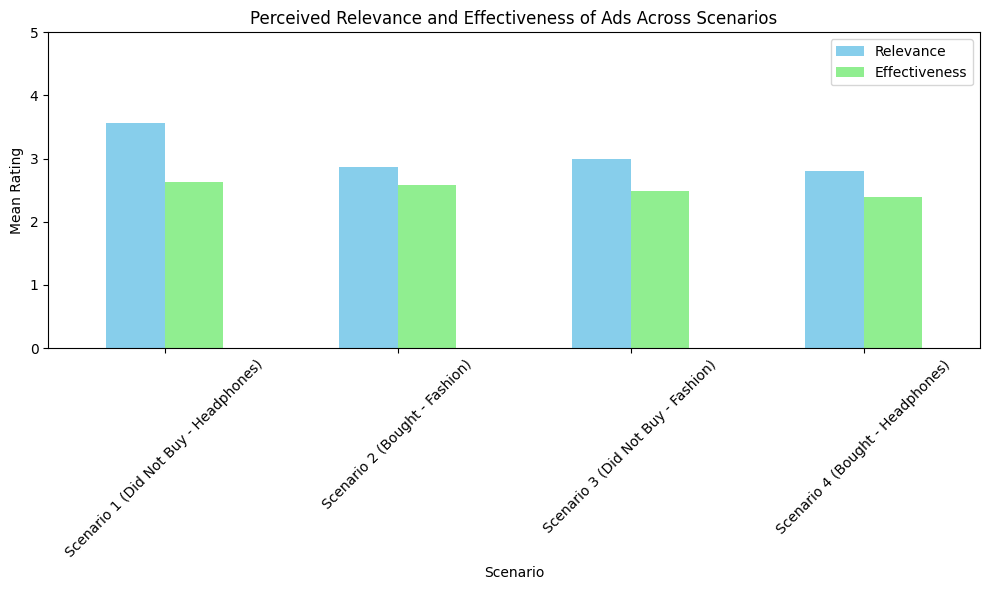

In [ ]:
import matplotlib.pyplot as plt

# Display the first few rows to understand the structure
print(data.head())

# Define the columns for relevance and effectiveness in each scenario
relevance_columns = {
    "Scenario 1 (Did Not Buy - Headphones)": 'Q11',
    "Scenario 2 (Bought - Fashion)": 'Q22',
    "Scenario 3 (Did Not Buy - Fashion)": 'Q30',
    "Scenario 4 (Bought - Headphones)": 'Q38'
}

effectiveness_columns = {
    "Scenario 1 (Did Not Buy - Headphones)": 'Q13',
    "Scenario 2 (Bought - Fashion)": 'Q24',
    "Scenario 3 (Did Not Buy - Fashion)": 'Q32',
    "Scenario 4 (Bought - Headphones)": 'Q40'
}

# Function to calculate descriptive statistics
def calculate_descriptive_stats(df, columns_dict):
    stats = {}
    for scenario, column in columns_dict.items():
        stats[scenario] = df[column].agg(['mean', 'median', 'std']).rename(scenario)
    return pd.DataFrame(stats)

# Calculate descriptive statistics for relevance and effectiveness
relevance_stats = calculate_descriptive_stats(data, relevance_columns)
effectiveness_stats = calculate_descriptive_stats(data, effectiveness_columns)

# Display the descriptive statistics
print("Relevance Statistics:\n", relevance_stats.T)
print("\nEffectiveness Statistics:\n", effectiveness_stats.T)

# Combine relevance and effectiveness into one DataFrame for easier plotting
combined_stats = pd.DataFrame({
    "Relevance": relevance_stats.T['mean'],
    "Effectiveness": effectiveness_stats.T['mean']
})

# Plotting both Relevance and Effectiveness side by side
combined_stats.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'])

plt.title('Perceived Relevance and Effectiveness of Ads Across Scenarios')
plt.xlabel('Scenario')
plt.ylabel('Mean Rating')
plt.ylim(0, 5)
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Define the columns for dissonance and brand loyalty in each scenario
dissonance_columns = {
    "Scenario 1 (Did Not Buy - Headphones)": 'Q12',
    "Scenario 2 (Bought - Fashion)": 'Q23',
    "Scenario 3 (Did Not Buy - Fashion)": 'Q31',
    "Scenario 4 (Bought - Headphones)": 'Q39'
}

brand_loyalty_columns = {
    "Scenario 1 (Did Not Buy - Headphones)": 'Q14',
    "Scenario 2 (Bought - Fashion)": 'Q25',
    "Scenario 3 (Did Not Buy - Fashion)": 'Q33',
    "Scenario 4 (Bought - Headphones)": 'Q41'
}

# Calculate descriptive statistics for dissonance and brand loyalty
dissonance_stats = calculate_descriptive_stats(data, dissonance_columns)
brand_loyalty_stats = calculate_descriptive_stats(data, brand_loyalty_columns)

# Display the descriptive statistics
dissonance_stats.T, brand_loyalty_stats.T


(                                           mean  median       std
 Scenario 1 (Did Not Buy - Headphones)  3.019231     3.0  1.023802
 Scenario 2 (Bought - Fashion)          2.836538     3.0  0.925482
 Scenario 3 (Did Not Buy - Fashion)     2.990385     3.0  1.127720
 Scenario 4 (Bought - Headphones)       2.913462     3.0  1.166778,
                                            mean  median       std
 Scenario 1 (Did Not Buy - Headphones)  2.336538     2.0  1.111376
 Scenario 2 (Bought - Fashion)          2.403846     2.0  1.202903
 Scenario 3 (Did Not Buy - Fashion)     2.259615     2.0  1.097174
 Scenario 4 (Bought - Headphones)       2.432692     2.0  1.275341)

In [ ]:
# Create a DataFrame for Dissonance Statistics
dissonance_table = pd.DataFrame({
    "Scenario": ["Scenario 1 (Did Not Buy - Headphones)",
                 "Scenario 2 (Bought - Fashion)",
                 "Scenario 3 (Did Not Buy - Fashion)",
                 "Scenario 4 (Bought - Headphones)"],
    "Mean": [3.02, 2.84, 2.99, 2.91],
    "Median": [3.0, 3.0, 3.0, 3.0],
    "Standard Deviation": [1.02, 0.93, 1.13, 1.17]
})

# Create a DataFrame for Brand Loyalty Statistics
brand_loyalty_table = pd.DataFrame({
    "Scenario": ["Scenario 1 (Did Not Buy - Headphones)",
                 "Scenario 2 (Bought - Fashion)",
                 "Scenario 3 (Did Not Buy - Fashion)",
                 "Scenario 4 (Bought - Headphones)"],
    "Mean": [2.34, 2.40, 2.26, 2.43],
    "Median": [2.0, 2.0, 2.0, 2.0],
    "Standard Deviation": [1.11, 1.20, 1.10, 1.28]
})

# Display the tables
print("Consumer Dissonance Statistics:")
print(dissonance_table)

print("\nBrand Loyalty Statistics:")
print(brand_loyalty_table)


Consumer Dissonance Statistics:
                                Scenario  Mean  Median  Standard Deviation
0  Scenario 1 (Did Not Buy - Headphones)  3.02     3.0                1.02
1          Scenario 2 (Bought - Fashion)  2.84     3.0                0.93
2     Scenario 3 (Did Not Buy - Fashion)  2.99     3.0                1.13
3       Scenario 4 (Bought - Headphones)  2.91     3.0                1.17

Brand Loyalty Statistics:
                                Scenario  Mean  Median  Standard Deviation
0  Scenario 1 (Did Not Buy - Headphones)  2.34     2.0                1.11
1          Scenario 2 (Bought - Fashion)  2.40     2.0                1.20
2     Scenario 3 (Did Not Buy - Fashion)  2.26     2.0                1.10
3       Scenario 4 (Bought - Headphones)  2.43     2.0                1.28


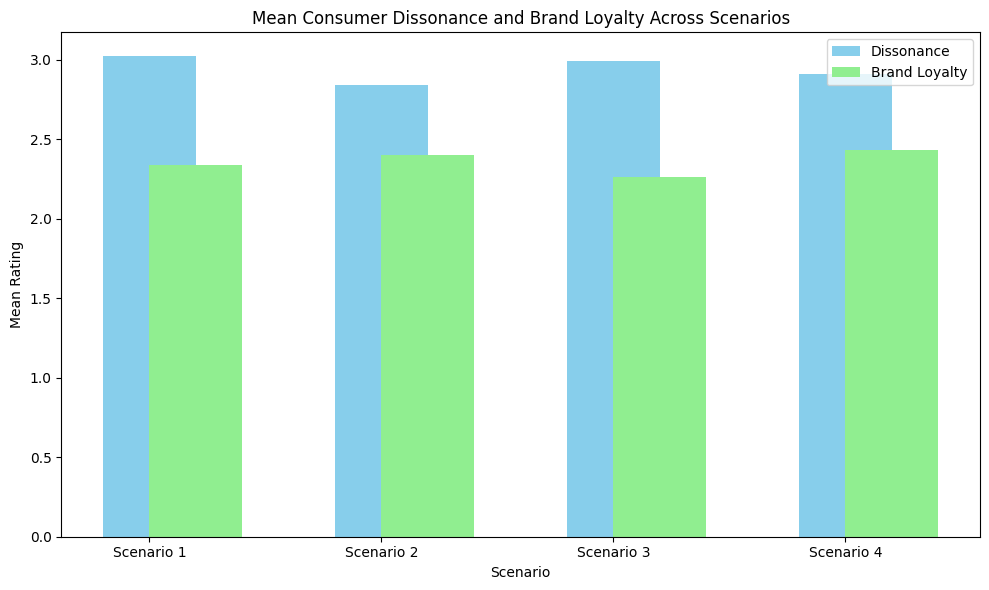

In [ ]:
# Data for Grouped Bar Chart
labels = ["Scenario 1", "Scenario 2", "Scenario 3", "Scenario 4"]
dissonance_means = [3.02, 2.84, 2.99, 2.91]
brand_loyalty_means = [2.34, 2.40, 2.26, 2.43]

x = range(len(labels))

# Grouped Bar Chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, dissonance_means, width=0.4, label='Dissonance', align='center', color='skyblue')
ax.bar(x, brand_loyalty_means, width=0.4, label='Brand Loyalty', align='edge', color='lightgreen')

ax.set_xlabel('Scenario')
ax.set_ylabel('Mean Rating')
ax.set_title('Mean Consumer Dissonance and Brand Loyalty Across Scenarios')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()



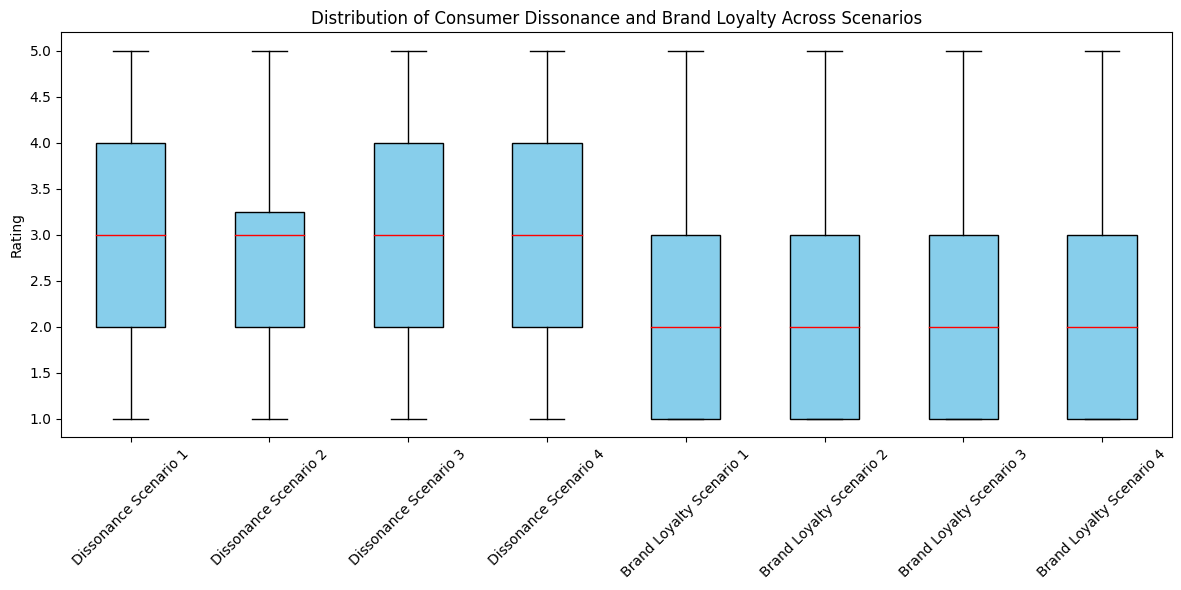

In [ ]:
# Data for Box Plot
boxplot_data = [data[col].dropna() for col in dissonance_columns.values()] + \
               [data[col].dropna() for col in brand_loyalty_columns.values()]

# Labels for Box Plot
boxplot_labels = ["Dissonance Scenario 1", "Dissonance Scenario 2", "Dissonance Scenario 3", "Dissonance Scenario 4",
                  "Brand Loyalty Scenario 1", "Brand Loyalty Scenario 2", "Brand Loyalty Scenario 3", "Brand Loyalty Scenario 4"]

# Box Plot
plt.figure(figsize=(12, 6))
plt.boxplot(boxplot_data, labels=boxplot_labels, patch_artist=True,
            boxprops=dict(facecolor='skyblue'), medianprops=dict(color='red'))

plt.title('Distribution of Consumer Dissonance and Brand Loyalty Across Scenarios')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Bought Means DataFrame:
               Fashion (Bought)  Electronics (Bought)
Relevance              2.875000              2.807692
Effectiveness          2.576923              2.394231
Dissonance             2.836538              2.913462
Brand Loyalty          2.403846              2.432692


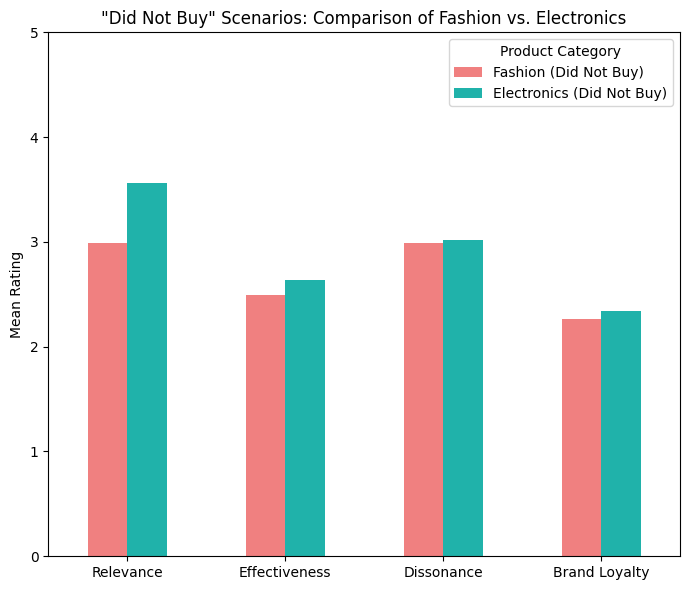

In [ ]:
# Define the questions for each scenario
did_not_buy_fashion = ['Q30', 'Q32', 'Q31', 'Q33']  # Fashion - Did Not Buy
did_not_buy_electronics = ['Q11', 'Q13', 'Q12', 'Q14']  # Electronics - Did Not Buy

bought_fashion = ['Q22', 'Q24', 'Q23', 'Q25']  # Fashion - Bought
bought_electronics = ['Q38', 'Q40', 'Q39', 'Q41']  # Electronics - Bought

# Correctly calculate means by ensuring alignment with index
did_not_buy_means = pd.DataFrame({
    "Fashion (Did Not Buy)": data[did_not_buy_fashion].mean().values,
    "Electronics (Did Not Buy)": data[did_not_buy_electronics].mean().values
}, index=['Relevance', 'Effectiveness', 'Dissonance', 'Brand Loyalty'])

bought_means = pd.DataFrame({
    "Fashion (Bought)": data[bought_fashion].mean().values,
    "Electronics (Bought)": data[bought_electronics].mean().values
}, index=['Relevance', 'Effectiveness', 'Dissonance', 'Brand Loyalty'])

# Check the bought_means DataFrame
print("Bought Means DataFrame:")
print(bought_means)

# Plotting the "Did Not Buy" scenarios
fig, ax = plt.subplots(figsize=(7, 6))
did_not_buy_means.plot(kind='bar', ax=ax, color=['lightcoral', 'lightseagreen'])
ax.set_title('"Did Not Buy" Scenarios: Comparison of Fashion vs. Electronics')
ax.set_ylabel('Mean Rating')
ax.set_ylim(0, 5)
plt.xticks(rotation=0)
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()



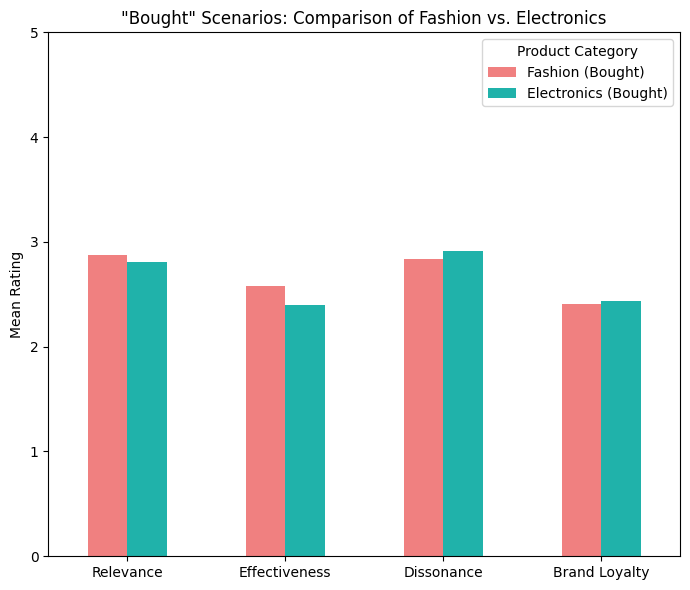

In [ ]:
# Plotting the "Bought" scenarios
fig, ax = plt.subplots(figsize=(7, 6))
bought_means.plot(kind='bar', ax=ax, color=['lightcoral', 'lightseagreen'])
ax.set_title('"Bought" Scenarios: Comparison of Fashion vs. Electronics')
ax.set_ylabel('Mean Rating')
ax.set_ylim(0, 5)
plt.xticks(rotation=0)
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()


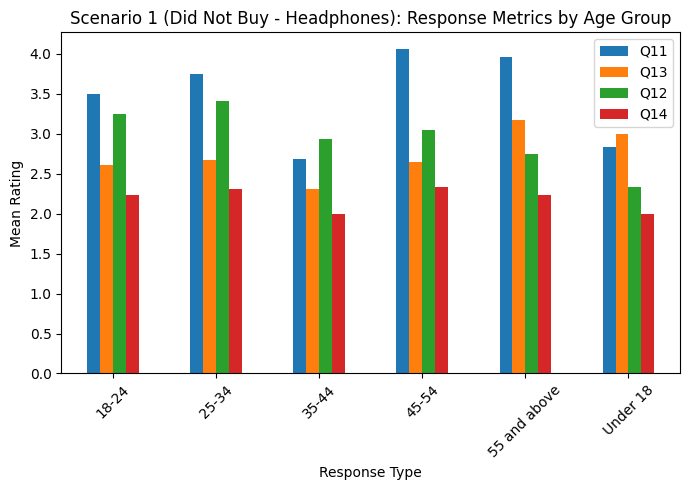

In [ ]:
# Mapping age groups and gender to more descriptive labels
age_group_mapping = {
    1: 'Under 18',
    2: '18-24',
    3: '25-34',
    4: '35-44',
    5: '45-54',
    6: '55 and above'
}

gender_mapping = {
    1: 'Female',
    2: 'Male'
}

# Apply mappings to the columns in your data
data['Age Group'] = data['Q3'].map(age_group_mapping)
data['Gender'] = data['Q4'].map(gender_mapping)

# Define the scenarios
scenarios = {
    "Scenario 1 (Did Not Buy - Headphones)": ['Q11', 'Q13', 'Q12', 'Q14'],
    "Scenario 2 (Bought - Fashion)": ['Q22', 'Q24', 'Q23', 'Q25'],
    "Scenario 3 (Did Not Buy - Fashion)": ['Q30', 'Q32', 'Q31', 'Q33'],
    "Scenario 4 (Bought - Headphones)": ['Q38', 'Q40', 'Q39', 'Q41']
}

# Function to calculate mean response metrics by demographics
def calculate_demographic_stats(df, scenario_columns):
    demographics_stats = df.groupby(['Age Group', 'Gender'])[scenario_columns].mean()
    return demographics_stats

# Calculate stats for each scenario
scenario_stats = {}
for scenario, columns in scenarios.items():
    scenario_stats[scenario] = calculate_demographic_stats(data, columns)

# Example: Visualize Scenario 1 by Age Group
scenario_1_stats = scenario_stats["Scenario 1 (Did Not Buy - Headphones)"]

# Plotting Example for Age Group in Scenario 1
fig, ax = plt.subplots(figsize=(7, 5))
scenario_1_stats.groupby('Age Group').mean().plot(kind='bar', ax=ax)
ax.set_title('Scenario 1 (Did Not Buy - Headphones): Response Metrics by Age Group')
ax.set_ylabel('Mean Rating')
ax.set_xlabel('Response Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

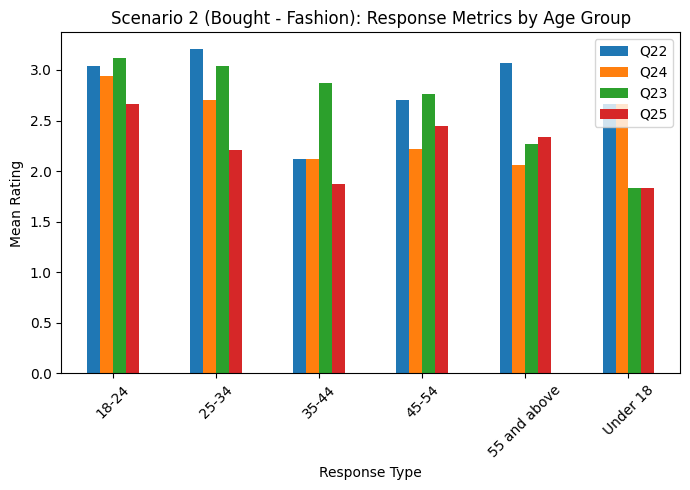

In [ ]:
# Scenario 2: Bought - Fashion
scenario_2_stats = scenario_stats["Scenario 2 (Bought - Fashion)"]

fig, ax = plt.subplots(figsize=(7, 5))
scenario_2_stats.groupby('Age Group').mean().plot(kind='bar', ax=ax)
ax.set_title('Scenario 2 (Bought - Fashion): Response Metrics by Age Group')
ax.set_ylabel('Mean Rating')
ax.set_xlabel('Response Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

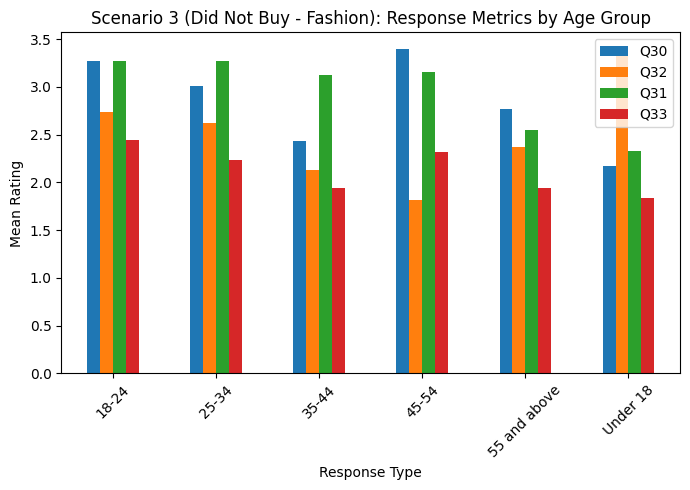

In [ ]:
# Scenario 3: Did Not Buy - Fashion
scenario_3_stats = scenario_stats["Scenario 3 (Did Not Buy - Fashion)"]

fig, ax = plt.subplots(figsize=(7, 5))
scenario_3_stats.groupby('Age Group').mean().plot(kind='bar', ax=ax)
ax.set_title('Scenario 3 (Did Not Buy - Fashion): Response Metrics by Age Group')
ax.set_ylabel('Mean Rating')
ax.set_xlabel('Response Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

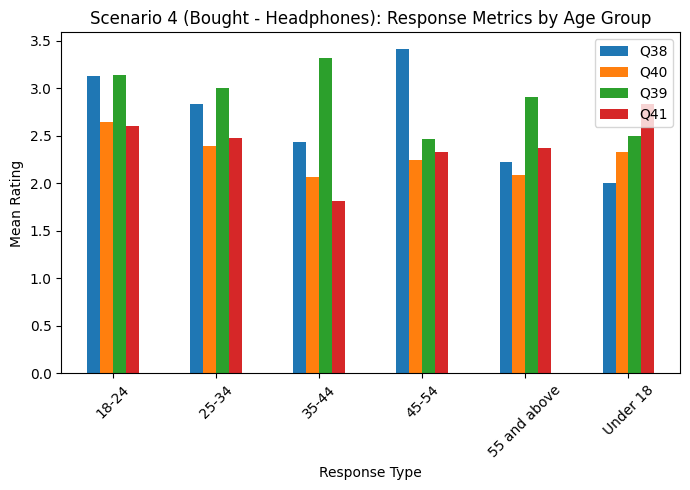

In [ ]:
# Scenario 4: Bought - Headphones
scenario_4_stats = scenario_stats["Scenario 4 (Bought - Headphones)"]

fig, ax = plt.subplots(figsize=(7, 5))
scenario_4_stats.groupby('Age Group').mean().plot(kind='bar', ax=ax)
ax.set_title('Scenario 4 (Bought - Headphones): Response Metrics by Age Group')
ax.set_ylabel('Mean Rating')
ax.set_xlabel('Response Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

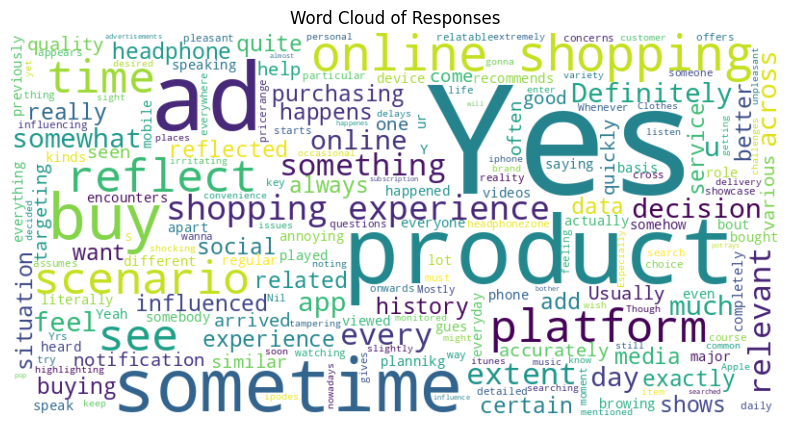

In [ ]:
from wordcloud import WordCloud
open_ended_responses = data['Q10'].dropna()  # Drop missing values

# Combine all responses into a single text string
text_data = ' '.join(open_ended_responses)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Responses')
plt.show()

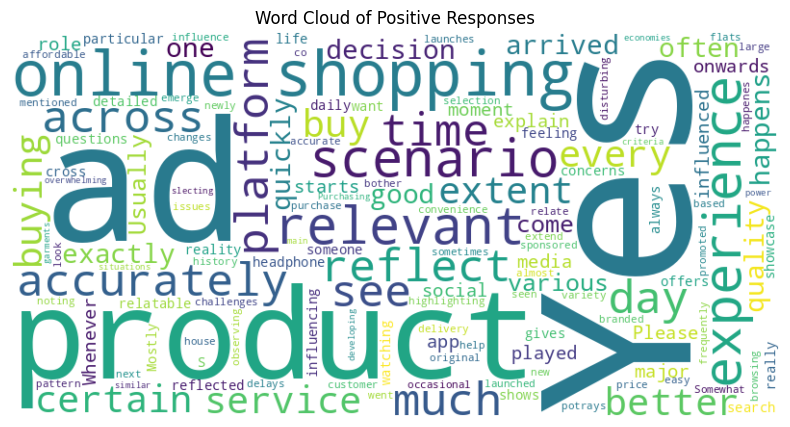

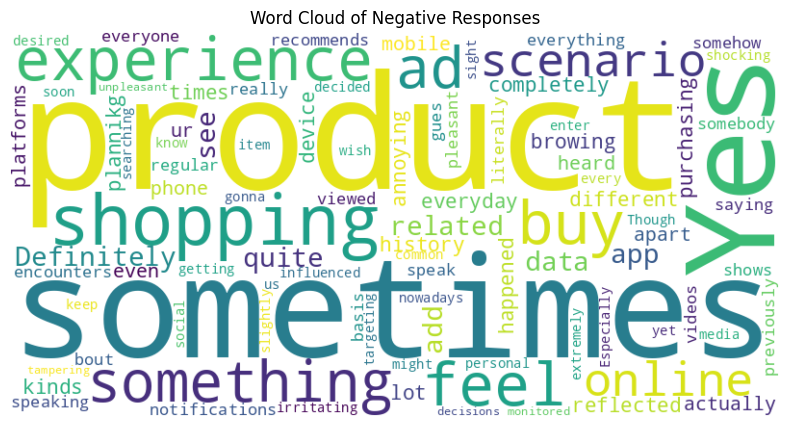

In [ ]:

from wordcloud import WordCloud
from textblob import TextBlob
# Function to categorize sentiment
def categorize_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the open-ended responses in Q10
data['Sentiment'] = data['Q10'].dropna().apply(categorize_sentiment)

# Separate positive and negative responses
positive_responses = data[data['Sentiment'] == 'positive']['Q10'].dropna()
negative_responses = data[data['Sentiment'] == 'negative']['Q10'].dropna()

# Combine the text for word clouds
positive_text = " ".join(positive_responses)
negative_text = " ".join(negative_responses)

# Generate the word cloud for positive words
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Generate the word cloud for negative words
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the positive word cloud
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Responses')
plt.show()

# Display the negative word cloud
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Responses')
plt.show()



In [ ]:
from collections import Counter
import pandas as pd

# Generate word frequencies for positive and negative responses
positive_words = positive_text.split()
negative_words = negative_text.split()

# Count the frequencies of each word
positive_word_freq = Counter(positive_words)
negative_word_freq = Counter(negative_words)

# Convert to DataFrame for better readability and sorting
positive_word_freq_df = pd.DataFrame(positive_word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
negative_word_freq_df = pd.DataFrame(negative_word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Display the top words in each category
top_positive_words = positive_word_freq_df.head(20)
top_negative_words = negative_word_freq_df.head(20)

print("Top Positive Words:")
print(top_positive_words)

print("\nTop Negative Words:")
print(top_negative_words)


Top Positive Words:
         Word  Frequency
29        the         13
41        and          9
3          to          8
34        ads          8
0         Yes          7
14          I          7
54         of          6
8           a          6
26     online          5
22       Yes,          5
6          it          5
11         in          4
27   shopping          4
35         on          4
73         is          4
38    product          3
83         It          3
30       very          3
177        we          3
179    across          3

Top Negative Words:
          Word  Frequency
24          to          7
1          the          6
19           a          5
79          is          4
13          of          4
50         you          4
77           I          4
29   sometimes          4
93        that          3
64         and          3
80   something          3
25         buy          3
5           my          3
22          we          3
41          it          3
89         not    